# Data Project. Python For Data

Estos conjuntos de datos están relacionados con campañas de marketing directo de una institución bancaria portuguesa. Las campañas de marketing se basaron en llamadas telefónicas. A menudo, se requería más de un contacto con el mismo cliente para determinar si el producto (depósito a plazo bancario) sería suscrito o no. Las columnas que tenemos en el primer dataset ('bank-additional.csv') son:
- age: La edad del cliente.
- job: La ocupación o profesión del cliente.
- marital: El estado civil del cliente.
- education: El nivel educativo del cliente.
- default: Indica si el cliente tiene algún historial de incumplimiento de pagos (1: Sí, 0: No).
- housing: Indica si el cliente tiene un préstamo hipotecario (1: Sí, 0: No).
- loan: Indica si el cliente tiene algún otro tipo de préstamo (1: Sí, 0: No).
- contact: El método de contacto utilizado para comunicarse con el cliente.
- duration: La duración en segundos de la última interacción con el cliente.
- campaign: El número de contactos realizados durante esta campaña para este cliente.
- pdays: Número de días que han pasado desde la última vez que se contactó con el cliente durante esta campaña.
- previous: Número de veces que se ha contactado con el cliente antes de esta campaña.
- poutcome: Resultado de la campaña de marketing anterior.
- emp.var.rate: La tasa de variación del empleo.
- cons.price.idx: El índice de precios al consumidor.
- cons.conf.idx: El índice de confianza del consumidor.
- euribor3m: La tasa de interés de referencia a tres meses.
- nr.employed: El número de empleados.
- y: Indica si el cliente ha suscrito un producto o servicio (Sí/No).
- date: La fecha en la que se realizó la interacción con el cliente.
- latitude: La latitud geográfica (coordenada Norte-Sur) del lugar donde se realizó la interacción con el cliente.
- longitude: La longitud geográfica (coordenada Este-Oeste) del lugar donde se realizó la interacción con el cliente.
- id_: Un identificador único para cada registro en el dataset.

El segundo set de datos ('customer-details.xlsx') es un archivo Excel que nos da información sobre las características demográficas y comportamiento de compra de los clientes del banco. Este Excel consta de 3 hojas de trabajo diferentes, en cada una de ellas tenemos los clientes que entraron en el banco en diferentes años. Sus columnas son:
- Income: Representa el ingreso anual del cliente en términos monetarios.
- Kidhome: Indica el número de niños en el hogar del cliente.
- Teenhome: Indica el número de adolescentes en el hogar del cliente.
- Dt_Customer: Representa la fecha en que el cliente se convirtió en cliente de la empresa.
- NumWebVisitsMonth: Indica la cantidad de visitas mensuales del cliente al sitio web de la empresa.
- ID: Identificador único del cliente.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Transformación y limpieza de los datos de la tabla CVS

In [2]:
# Importación de los datos desde un CSV
data1 = pd.read_csv('/Users/claudiarm2002/Desktop/Master/Data Analythics/8_PythonForData/DataProject-Python-for-Data/DatosProyecto/bank-additional.csv', sep=',', header=0, index_col=0)

In [3]:
pd.set_option('display.max_columns', None)
data1.head(5)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_
0,NaN,housemaid,MARRIED,basic.4y,0.0,0.0,0.0,telephone,261,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857",5191,no,2-agosto-2019,41.495,-71.233,089b39d8-e4d0-461b-87d4-814d71e0e079
1,57.0,services,MARRIED,high.school,NaN,0.0,0.0,telephone,149,1,999,0,NONEXISTENT,1.1,"93,994","-36,4",NaN,5191,no,14-septiembre-2016,34.601,-83.923,e9d37224-cb6f-4942-98d7-46672963d097
2,37.0,services,MARRIED,high.school,0.0,1.0,0.0,telephone,226,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857",5191,no,15-febrero-2019,34.939,-94.847,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,40.0,admin.,MARRIED,basic.6y,0.0,0.0,0.0,telephone,151,1,999,0,NONEXISTENT,1.1,"93,994","-36,4",NaN,5191,no,29-noviembre-2015,49.041,-70.308,9991fafb-4447-451a-8be2-b0df6098d13e
4,56.0,services,MARRIED,high.school,0.0,0.0,1.0,telephone,307,1,999,0,NONEXISTENT,1.1,"93,994","-36,4",NaN,5191,no,29-enero-2017,38.033,-104.463,eca60b76-70b6-4077-80ba-bc52e8ebb0eb


In [4]:
# Miramos si hay duplicados
data1.duplicated().sum()

0

In [5]:
data1['id_'].duplicated().sum()

0

In [6]:
# Realizando las funciones para limpiar la columna 'euribor3m' he visto que hay indices duplicados
data1[data1.index.duplicated()]

# Muestro los indices duplicados uno al lado del otro
data1[data1.index.duplicated(keep=False)].sort_index()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_
11,25.0,services,SINGLE,high.school,0.0,1.0,0.0,telephone,222,1,999,0,NONEXISTENT,1.1,"93,994","-36,4",NaN,5191,no,17-abril-2016,49.118,-85.121,ca5c0d7a-8bbd-42b3-8351-1074c5be011a
11,25.0,services,SINGLE,high.school,0.0,1.0,0.0,telephone,222,1,999,0,NONEXISTENT,1.1,"93,994","-36,4",NaN,5191,no,2-diciembre-2017,48.403,-91.142,09c1b759-3eda-4df1-9c72-5cd1c22f480f
35,55.0,NaN,MARRIED,basic.4y,NaN,1.0,0.0,telephone,336,1,999,0,NONEXISTENT,1.1,"93,994","-36,4",NaN,5191,no,11-febrero-2018,49.107,-116.582,7aeeda6f-95df-402b-a8d8-817764f4dafe
35,55.0,NaN,MARRIED,basic.4y,NaN,1.0,0.0,telephone,336,1,999,0,NONEXISTENT,1.1,"93,994","-36,4",NaN,5191,no,5-diciembre-2019,40.656,-123.384,7c0bfe16-371e-4476-90f1-fcfbae992106
49,45.0,blue-collar,MARRIED,basic.9y,0.0,1.0,0.0,telephone,225,2,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857",5191,no,15-mayo-2018,47.710,-91.255,652ef647-2ee2-4afd-8cd1-105ff08b9dfb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41127,61.0,admin.,MARRIED,high.school,0.0,1.0,1.0,cellular,386,2,999,0,NONEXISTENT,-1.1,"94,767","-50,8","1,044","4963,6",yes,11-octubre-2019,26.354,-102.789,a732a356-5a75-416a-9783-6ac14b8084e9
41139,31.0,services,MARRIED,high.school,0.0,1.0,0.0,cellular,202,3,999,0,NONEXISTENT,-1.1,"94,767","-50,8",NaN,"4963,6",no,13-junio-2017,25.104,-106.090,a8465b8c-c669-475b-a9ba-9b280cc254b8
41139,31.0,services,MARRIED,high.school,0.0,1.0,0.0,cellular,202,3,999,0,NONEXISTENT,-1.1,"94,767","-50,8",NaN,"4963,6",no,16-diciembre-2017,41.295,-77.060,f7e1698e-c4ce-445b-8b04-e8579d614cf4
41141,37.0,admin.,MARRIED,university.degree,0.0,1.0,0.0,cellular,315,1,999,0,NONEXISTENT,-1.1,"94,767","-50,8",NaN,"4963,6",yes,19-noviembre-2018,30.805,-111.862,6778376d-b069-440e-b82b-24eeec244443


Se puede observar que solo canvian las columnas 'date', 'latitude' y 'longitude'. Por lo tanto, se trata de distintas llamadas a un mismo cliente en distintas fechas y ubicaciones. Dependiendo del análisis que se quiera hacer, puede ser interesante eliminar estos duplicados.

In [7]:
# Vista general de la información del DataFrame
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43000 entries, 0 to 27570
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             37880 non-null  float64
 1   job             42655 non-null  object 
 2   marital         42915 non-null  object 
 3   education       41193 non-null  object 
 4   default         34019 non-null  float64
 5   housing         41974 non-null  float64
 6   loan            41974 non-null  float64
 7   contact         43000 non-null  object 
 8   duration        43000 non-null  int64  
 9   campaign        43000 non-null  int64  
 10  pdays           43000 non-null  int64  
 11  previous        43000 non-null  int64  
 12  poutcome        43000 non-null  object 
 13  emp.var.rate    43000 non-null  float64
 14  cons.price.idx  42529 non-null  object 
 15  cons.conf.idx   43000 non-null  object 
 16  euribor3m       33744 non-null  object 
 17  nr.employed     43000 non-null  obje

In [8]:
# Recuento de nulos por columna
data1.isnull().sum()

age               5120
job                345
marital             85
education         1807
default           8981
housing           1026
loan              1026
contact              0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx     471
cons.conf.idx        0
euribor3m         9256
nr.employed          0
y                    0
date               248
latitude             0
longitude            0
id_                  0
dtype: int64

Empezamos a limpiar la información por columnas.

In [9]:
# Copiamos el DataFrame original para trabajar sobre él
data_clean = data1.copy()

### Limpieza de la columna 'age'

En esta columna observamos muchos NaN y que debe ser 'int64' en vez de 'float64'.

In [10]:
# Miramos porcentaje de nulos en la columna 'age'
data1['age'].isnull().sum() / len(data_clean) * 100

11.906976744186046

In [11]:
data_clean['age'].describe()

count    37880.000000
mean        39.977112
std         10.437957
min         17.000000
25%         32.000000
50%         38.000000
75%         47.000000
max         98.000000
Name: age, dtype: float64

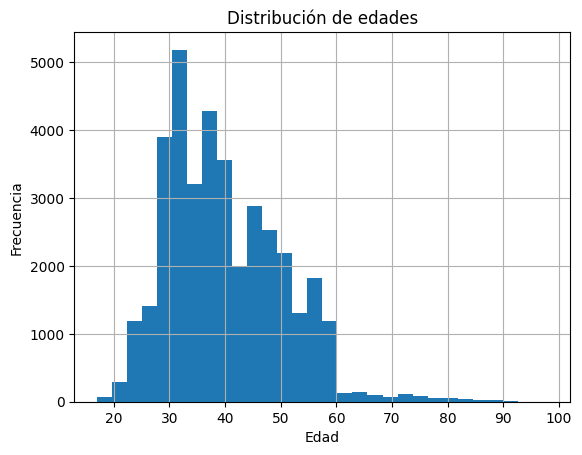

In [12]:
data_clean['age'].hist(bins=30)
plt.title('Distribución de edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show() 

La columna no sigue una distribución normal y está sesgada. Por lo tanto, usaremos una estrategia de imputación condicional (rellenar con la mediana por grupo) utilizando otra columna categórica (e.g., 'job' o 'education') para mantener la coherencia de los datos.

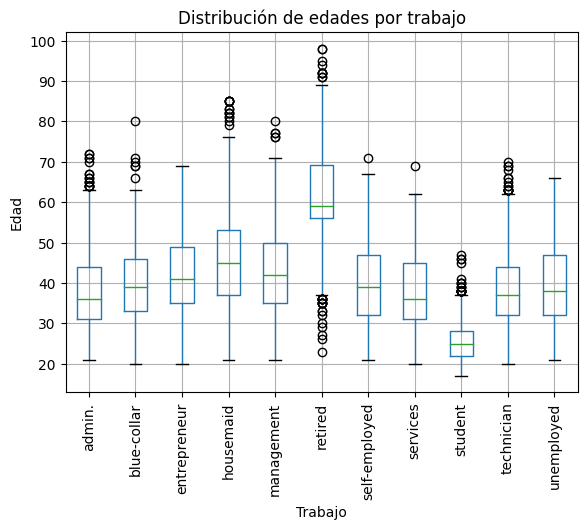

In [13]:
data_clean.boxplot(column='age', by='job', rot=90)
plt.title('Distribución de edades por trabajo')
plt.suptitle('')
plt.xlabel('Trabajo')
plt.ylabel('Edad')
plt.show()

En este grafico de cajas podemos observar que hay cierta relación entre el trabajo y la edad, pero también que hay muchos outliers.

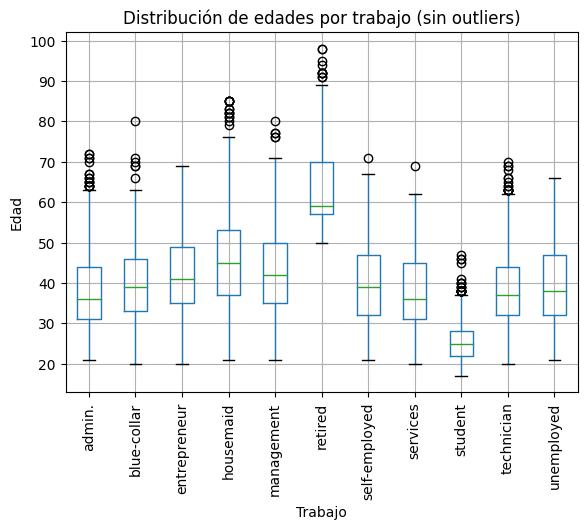

In [14]:
# Primero eliminamos los outliers inferiores de 'age' donde 'job' es retired, que no tienen ningun sentido.
# Nos quedamos solo con los datos que tienen sentido.
data_no_outliers = data_clean[~((data_clean['job'] == 'retired') & (data_clean['age'] < 50))]
data_no_outliers.boxplot(column='age', by='job', rot=90)
plt.title('Distribución de edades por trabajo (sin outliers)')
plt.suptitle('')
plt.xlabel('Trabajo')
plt.ylabel('Edad')
plt.show()

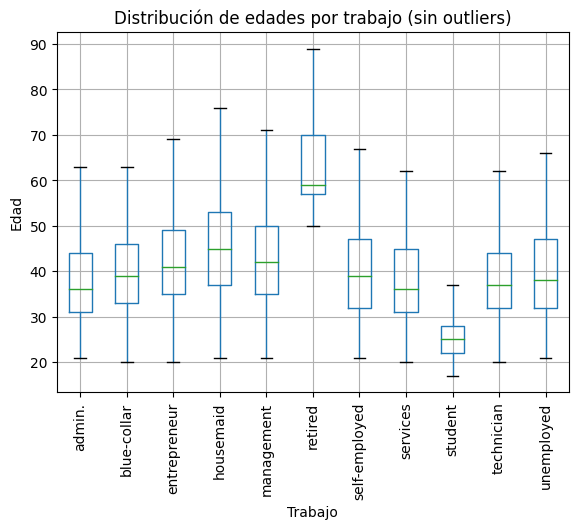

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Cálculo de los límites IQR por grupo 'job'
Q1 = data_no_outliers.groupby('job')['age'].quantile(0.25)
Q3 = data_no_outliers.groupby('job')['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 2. Función para eliminar outliers
def remove_outliers(row):
    if pd.isnull(row['age']):
        return True
    
    job_val = row['job']
    
    if pd.isnull(job_val) or job_val not in lower_bound.index:
        return True 
    
    if (row['age'] < lower_bound[job_val]) or (row['age'] > upper_bound[job_val]):
        return False # Elimina l'outlier
    
    return True 
    
# 3. Aplicar la función para eliminar outliers
data_no_outliers_final = data_no_outliers[data_no_outliers.apply(remove_outliers, axis=1)]

data_no_outliers_final.boxplot(column='age', by='job', rot=90)
plt.title('Distribución de edades por trabajo (sin outliers)')
plt.suptitle('')
plt.xlabel('Trabajo')
plt.ylabel('Edad')
plt.show()

In [16]:
job_age_median = data_no_outliers_final.groupby('job')['age'].median()
job_age_median

job
admin.           36.0
blue-collar      39.0
entrepreneur     41.0
housemaid        45.0
management       42.0
retired          59.0
self-employed    39.0
services         36.0
student          25.0
technician       37.0
unemployed       38.0
Name: age, dtype: float64

In [17]:
# Ahora ya podemos rellenar los NaN de 'age' con la mediana de cada grupo de 'job'
# Puede que haya columnas con NaN en 'job', entonces utilizaremos la mediana global de 'age'.
def fill_age(row):
    if pd.isnull(row['age']) and pd.isnull(row['job']):
        return data_no_outliers_final['age'].median()
    elif pd.isnull(row['age']):
        return job_age_median[row['job']]
    else:
        return row['age']
    
data_clean['age'] = data_clean.apply(fill_age, axis=1)

In [18]:
data_clean['age'].isnull().sum()

0

In [19]:
# Transformamos la columna 'age' a 'int64'
data_clean['age'] = data_clean['age'].astype('int64')

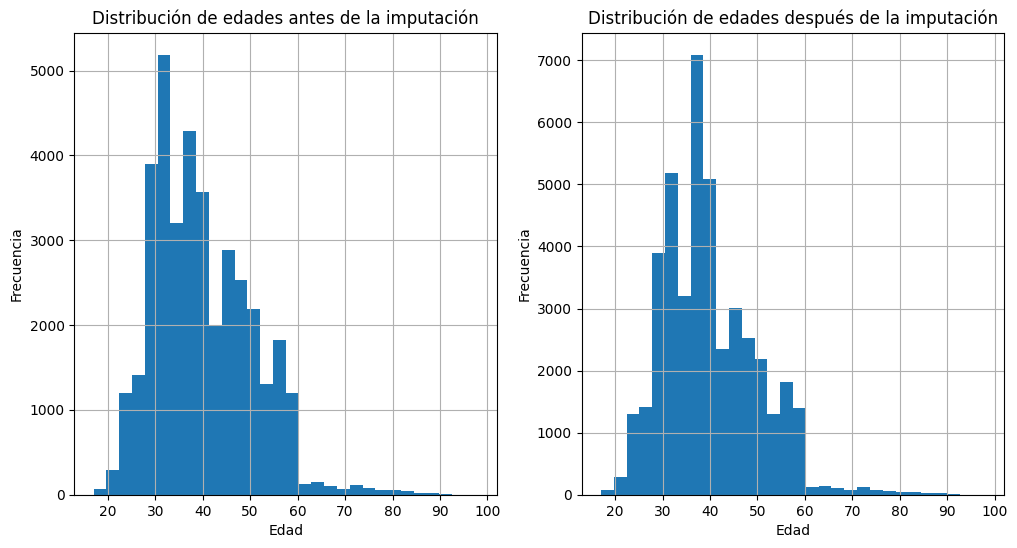

In [20]:
# Comparamos las distribuciones de 'age' antes y después de la imputación
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
data1['age'].hist(bins=30)
plt.title('Distribución de edades antes de la imputación')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.subplot(1, 2, 2)
data_clean['age'].hist(bins=30)
plt.title('Distribución de edades después de la imputación')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

In [21]:
data_clean.head(5)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_
0,45,housemaid,MARRIED,basic.4y,0.0,0.0,0.0,telephone,261,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857",5191,no,2-agosto-2019,41.495,-71.233,089b39d8-e4d0-461b-87d4-814d71e0e079
1,57,services,MARRIED,high.school,NaN,0.0,0.0,telephone,149,1,999,0,NONEXISTENT,1.1,"93,994","-36,4",NaN,5191,no,14-septiembre-2016,34.601,-83.923,e9d37224-cb6f-4942-98d7-46672963d097
2,37,services,MARRIED,high.school,0.0,1.0,0.0,telephone,226,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857",5191,no,15-febrero-2019,34.939,-94.847,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,40,admin.,MARRIED,basic.6y,0.0,0.0,0.0,telephone,151,1,999,0,NONEXISTENT,1.1,"93,994","-36,4",NaN,5191,no,29-noviembre-2015,49.041,-70.308,9991fafb-4447-451a-8be2-b0df6098d13e
4,56,services,MARRIED,high.school,0.0,0.0,1.0,telephone,307,1,999,0,NONEXISTENT,1.1,"93,994","-36,4",NaN,5191,no,29-enero-2017,38.033,-104.463,eca60b76-70b6-4077-80ba-bc52e8ebb0eb


### Limpieza de la columna 'job'

En esta columna se observan pocos Nan (que sustituiremos por 'unknown') y el valor admin.

In [22]:
data_clean['job'].isnull().sum()

345

In [23]:
data_clean['job'].value_counts()

job
admin.           10873
blue-collar       9654
technician        7026
services          4162
management        3050
retired           1790
entrepreneur      1522
self-employed     1489
housemaid         1123
unemployed        1063
student            903
Name: count, dtype: int64

In [24]:
# Sustituimos los NaN de 'job' por 'unknown'i 'admin.' por 'administrative'
data_clean['job'] = data_clean['job'].fillna('unknown')
data_clean['job'] = data_clean['job'].replace('admin.', 'administrative')

### Limpieza de la columna 'marital'

En esta columna solo tenemos que canviar a minúsculas los valores y sustituir los Nan por 'unknown' ya que hay muy pocos.

In [25]:
data_clean['marital'] = data_clean['marital'].str.lower()
data_clean['marital'] = data_clean['marital'].fillna('unknown')

### Limpieza de la columna 'education'

En esta columna se aprecian puntos en lugar de espacios y bastantes Nan que sustituiremos por 'unknown'.

In [26]:
data_clean['education'].isnull().sum()

1807

In [27]:
# Analizamos las categorías de 'education'
data_clean['education'].value_counts()

education
university.degree      12722
high.school             9925
basic.9y                6309
professional.course     5477
basic.4y                4356
basic.6y                2386
illiterate                18
Name: count, dtype: int64

In [28]:
data_clean['education'] = data_clean['education'].str.replace('.', ' ')
data_clean['education'] = data_clean['education'].fillna('unknown')

### Limpieza de la columna 'default'

In [29]:
data_clean['default'].value_counts()

default
0.0    34016
1.0        3
Name: count, dtype: int64

La columna 'default' tiene muchos $NaN$ y es binaria. Utilizamos las columnas 'housing' y 'loan' para una imputación lógica:

Imputación Segura (0): Si un cliente no tiene hipoteca ni otro préstamo (housing = 0 y loan = 0), asumimos que el $NaN$ en 'default' significa 0 (No Incumplimiento), pues no tiene deudas registradas.

In [30]:
# Nos aseguramos que tenga sentido nuestra lógica, miramos las columnas 'housing' y 'loan' donde 'default' es 1.
data_clean[['housing', 'loan']][data_clean['default'] == 1].head(10)

,housing,loan
21580,0.0,0.0
21581,1.0,0.0
24866,0.0,0.0


In [31]:
data_clean[['housing', 'loan']][data_clean['default'] == 0].head(10)

,housing,loan
0,0.0,0.0
2,1.0,0.0
3,0.0,0.0
4,0.0,1.0
6,0.0,0.0
8,1.0,0.0
9,1.0,0.0
11,1.0,0.0
12,0.0,1.0
13,1.0,0.0


In [32]:
# No vamos a realizar la imputación que hemos planteado.

Imputación 'Desconocido' (-1): Los $NaN$ se rellenan con un valor nuevo, como -1.

In [33]:
data_clean['default'] = data_clean['default'].fillna('-1')

In [34]:
# Transformamos a 'int64'
data_clean['default'] = data_clean['default'].astype('int64')

In [35]:
# Renombramos las columna 'default' para mayor claridad
data_clean = data_clean.rename(columns={'default': 'payment_default'})

### Limpieza de la columna 'housing' y 'loan'

Hay pocos Nan y son en las dos columnas a la vez.

In [36]:
# Sustituimos los NaN de 'housing' y 'loan' por '-1'
data_clean['housing'] = data_clean['housing'].fillna('-1')
data_clean['loan'] = data_clean['loan'].fillna('-1')

In [37]:
# Transformamos a 'int64'
data_clean['housing'] = data_clean['housing'].astype('int64')
data_clean['loan'] = data_clean['loan'].astype('int64')

### Limpieza de la columna 'contact'

No parece haber ningún problema con la información de esta columna.

In [38]:
data_clean['contact'].unique()

array(['telephone', 'cellular'], dtype=object)

### Limpieza de la columna 'duration'

No se necesita ninguna modificación. Se cambiará el nombre de la columna para más claridad.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


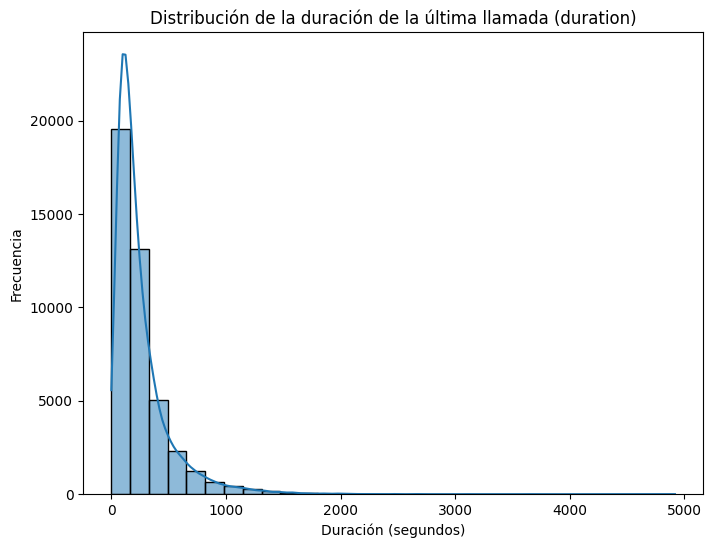

In [39]:
# Visualizamos la distribución de 'duration'
plt.figure(figsize=(8, 6))
sns.histplot(data_clean['duration'], bins=30, kde=True)
plt.title('Distribución de la duración de la última llamada (duration)')
plt.xlabel('Duración (segundos)')
plt.ylabel('Frecuencia')
plt.show()

In [40]:
# Rango de los datos de la columna 'duration'
data_clean['duration'].describe()

count    43000.000000
mean       257.739279
std        258.666033
min          0.000000
25%        102.000000
50%        179.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

In [41]:
# Cambiamo el nombre de la columna 'duration' a 'last_call_duration' para mayor claridad
data_clean = data_clean.rename(columns={'duration': 'last_call_duration'})

### Limpieza de la columna 'campaign'

Esta columna no tiene Nan y lo único que se debería cambiar és el nombre de la columna.

In [42]:
data_clean['campaign'].describe()

count    43000.000000
mean         2.567233
std          2.772294
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64

In [43]:
# Cambiamos el nombre de la columna 'campaign' a 'contacts_last_campaign' para mayor claridad
data_clean = data_clean.rename(columns={'campaign': 'contacts_last_campaign'})

### Limpieza de la columna 'pdays'

Cambiamos el nombre de la columna y cambiamos el valor 999 por -1.

In [44]:
data_clean['pdays'].replace(999, -1, inplace=True)
data_clean = data_clean.rename(columns={'pdays': 'days_since_last_contact'})

### Limpieza de la columna 'previous'

Cambiemos el nombre de la columna y cambiamos el valor 999 por -1.

In [45]:
data_clean['previous'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7])

In [46]:
data_clean = data_clean.rename(columns={'previous': 'previous_campaign_contacts'})

### Limpieza de la columna 'poutcome'

Al tener solo tres posibles valores, los sustituimos por -1, 0 y 1.

In [47]:
data_clean['poutcome'].unique()

array(['NONEXISTENT', 'FAILURE', 'SUCCESS'], dtype=object)

In [48]:
# Cambiamos el nombre de la columna 'poutcome' a 'last_outcome_success' para mayor claridad.
data_clean = data_clean.rename(columns={'poutcome': 'last_outcome_success'})

In [49]:
# Sustituimos 'NONEXISTENT' por -1, 'SUCCESS' por 1 y 'FAILURE' por 0
data_clean['last_outcome_success'] = data_clean['last_outcome_success'].replace({'NONEXISTENT': -1, 'SUCCESS': 1, 'FAILURE': 0})

### Limpieza de la columna 'date'

In [50]:
# Tenemos el mes en 'string', función para cambiarla a número

def date_str_to_num(str):
    # 1-abril-2015 to 1-4-2015
    month_dict = {
        'enero': 1,
        'febrero': 2,
        'marzo': 3,
        'abril': 4,
        'mayo': 5,
        'junio': 6,
        'julio': 7,
        'agosto': 8,
        'septiembre': 9,
        'octubre': 10,
        'noviembre': 11,
        'diciembre': 12
    }
    # Evitamos los Nan
    if pd.isnull(str):
        return str
    
    day, month_str, year = str.split('-')
    month_num = month_dict[month_str.lower()]
    return f"{day}-{month_num}-{year}"

In [51]:
# Transformamos la columna 'date' a formato datetime
data_clean['date'] = pd.to_datetime(data_clean['date'].apply(date_str_to_num), format='%d-%m-%Y')

In [52]:
data_clean['date'].head(10)

0   2019-08-02
1   2016-09-14
2   2019-02-15
3   2015-11-29
4   2017-01-29
5   2015-09-26
6   2019-01-25
7   2017-09-25
8   2018-01-18
9   2016-11-02
Name: date, dtype: datetime64[ns]

In [53]:
data_clean['date'].isnull().sum() / len(data_clean) * 100

0.5767441860465117

In [54]:
# Como hay un porcentaje muy pequeño de Nan en 'date', los eliminamos.
data_clean.dropna(subset=['date'], inplace=True)

### Limpieza de la columna 'emp.var.rate'

La Tasa de Variación del Empleo es un indicador macroeconómico que mide el cambio porcentual en el número de personas empleadas en un período. Un valor positivo indica creación de empleo (economía en crecimiento), y un valor negativo indica destrucción de empleo (recesión).

In [55]:
# Comprobamos ordenando mediante la columna 'date' que la 'emp.var.rate' varia segun la fecha y no el cliente.
data_clean_order_by_date = data_clean[['date', 'emp.var.rate']].sort_values(by='date')
data_clean_order_by_date.head(10)

,date,emp.var.rate
32630,2015-01-01,-1.8
20343,2015-01-01,1.4
13659,2015-01-01,1.4
7394,2015-01-01,1.1
10836,2015-01-01,1.4
33441,2015-01-01,-1.8
38368,2015-01-01,-3.4
35385,2015-01-01,-1.8
20377,2015-01-01,1.4
5454,2015-01-01,1.1


### Limpieza dela columna 'cons.price.idx'

El Índice de Precios al Consumidor es una medida macroeconómica clave de la inflación, ya que refleja el costo promedio de una canasta de bienes y servicios básicos en un período. Un valor más alto indica que los precios suben y el poder adquisitivo disminuye.

Esta columna es de tipo 'object' y debería ser 'float64', además hay algun Nan.

In [56]:
data_clean['cons.price.idx'].unique()

array(['93,994', nan, '94,465', '93,918', '93,444', '93,798', '93,2',
       '92,756', '92,843', '93,075', '92,893', '92,963', '92,469',
       '92,201', '92,379', '92,431', '92,649', '92,713', '93,369',
       '93,749', '93,876', '94,055', '94,215', '94,027', '94,199',
       '94,601', '94,767'], dtype=object)

In [57]:
# Sustituimos la ',' por '.' y transformamos a float64
data_clean['cons.price.idx'] = data_clean['cons.price.idx'].str.replace(',', '.')
data_clean['cons.price.idx'] = data_clean['cons.price.idx'].astype('float64')

In [58]:
# Al ser una variable temporal, podemos imputar los NaN con el valor más cercano en el tiempo.
data_clean_order_by_date_price = data_clean[['date', 'cons.price.idx']].sort_values(by='date')
data_clean_order_by_date_price.sample(5)


,date,cons.price.idx
28651,2016-02-22,93.075
10535,2015-11-01,94.465
13026,2018-05-18,93.918
22468,2015-09-28,93.444
25460,2016-04-14,93.200


In [59]:
# Visualización de las 5 filas antes y después de la fecha 11-12-2019
data_clean_order_by_date_price.loc[ data_clean_order_by_date_price['date'].between('2019-12-06', '2019-12-16') ]

,date,cons.price.idx
10679,2019-12-06,94.465
16966,2019-12-06,93.918
29571,2019-12-06,93.075
34589,2019-12-06,92.893
15799,2019-12-06,93.918
...,...,...
26556,2019-12-16,93.200
9754,2019-12-16,94.465
40678,2019-12-16,94.199
35556,2019-12-16,92.893


In [60]:
# No he podido observar un patrón claro para imputar los NaN en 'cons.price.idx'.
# Imputaré los NaN con el valor -1
data_clean['cons.price.idx'] = data_clean['cons.price.idx'].fillna(-1)

### Limpieza de la columna 'cons.conf.idx'

El Índice de Confianza del Consumidor mide el optimismo promedio de los consumidores sobre el estado actual y futuro de la economía. No depende de un cliente particular, sino que es una medida agregada que anticipa las tendencias de gasto general.

Esta columna es de tipo 'object' y debería ser 'float64'.

In [61]:
# Visualizamos los valores de la columnas y la cantidad de cada valor
data_clean['cons.conf.idx'].value_counts()

cons.conf.idx
-36,4    7979
-42,7    6965
-46,2    6022
-36,1    5368
-41,8    4545
-42      3762
-47,1    2566
-31,4     814
-40,8     741
-26,9     475
-30,1     376
-40,3     325
-37,5     318
-50       299
-29,8     273
-34,8     271
-38,3     243
-39,8     239
-40       222
-49,5     213
-33,6     184
-33       181
-34,6     180
-50,8     132
-40,4      48
-45,9      11
Name: count, dtype: int64

In [62]:
# Sustituimos la ',' por '.' y transformamos a float64
data_clean['cons.conf.idx'] = data_clean['cons.conf.idx'].str.replace(',', '.')
data_clean['cons.conf.idx'] = data_clean['cons.conf.idx'].astype('float64')

### Limpieza de la columna 'euribor3m'

El Euribor a 3 meses es la tasa de interés promedio interbancaria en la zona euro a ese plazo, reflejando el coste del dinero y el riesgo financiero. Es clave para evaluar la rentabilidad del producto de ahorro y el riesgo de impago del cliente.

En esta columna tenemos muchos Nan, además los valores son 'object' y deberían ser 'float64'.

In [63]:
data_clean['euribor3m'] = data_clean['euribor3m'].str.replace(',', '.')
data_clean['euribor3m'] = data_clean['euribor3m'].astype('float64')

Segun la definición 'euribor3m' depende del momento temporal y el lugar.

In [64]:
# Quiero comprovar que 'euribor3m depende de la fecha, latitud y longitud y no del cliente.
data_clean_order_by_date_euribor = data_clean[['date', 'latitude', 'longitude', 'euribor3m']].sort_values(by=['date', 'latitude', 'longitude'])

data_clean_order_by_date_euribor.loc[ data_clean_order_by_date_euribor['date'].between('2015-01-15', '2015-01-25') & 
                                     data_clean_order_by_date_euribor['latitude'].between(40.4, 42.6) & 
                                     data_clean_order_by_date_euribor['longitude'].between(-120.8, -100.6) ]

,date,latitude,longitude,euribor3m
36360,2015-01-16,40.856,-107.333,1.262
27734,2015-01-16,41.192,-104.580,1.799
39058,2015-01-18,40.490,-102.324,0.712
16398,2015-01-20,40.798,-119.690,4.963
9988,2015-01-20,42.111,-118.427,4.959
7086,2015-01-21,42.085,-108.354,NaN
4089,2015-01-22,41.648,-113.349,4.858
25875,2015-01-22,42.134,-106.286,4.120
40062,2015-01-24,41.431,-118.644,0.810
40378,2015-01-25,42.089,-117.707,0.900


Se ve claramente que en un mismo día y en ubicaciones cercanas, el valor de 'euribor3m' es muy similar. Vamos a imputar los Nan buscando el valor de 'euribor3m' com la fila con 'date', 'latitude' y 'longitude' mas similar al Nan y lo sustituiremos por este.

In [65]:
# La idea es reducir el set de datos a buscar mediante un filtro geográfico
def euribor_cercano_optimitzat(row, df_valid):
    lat = row['latitude']
    lon = row['longitude']
    date = row['date']
    
    # Reducción del DataFrame a una zona geográfica cercana (0.1 grados de latitud y longitud)
    nearby_data = df_valid[
        (df_valid['latitude'].between(lat - 0.1, lat + 0.1)) &
        (df_valid['longitude'].between(lon - 0.1, lon + 0.1))
    ].copy()
    
    # Si no encuentra nada geográficamente cercano, devolvemos NaN
    if nearby_data.empty:
        return np.nan

    # Cálculo de la diferencia de tiempo absoluta (Vectorizado)
    nearby_data['time_diff'] = (nearby_data['date'] - date).abs()

    valid_time_diff = nearby_data['time_diff'].dropna()
    
    if valid_time_diff.empty:
        # Això passaria si totes les dates properes eren NaN o el càlcul falla
        return np.nan
    
    # Encontrar el valor más cercano
    idx_min_time_diff = valid_time_diff.idxmin()
    
    # Retornamos el valor Euribor de esa fila
    return nearby_data.loc[idx_min_time_diff, 'euribor3m']

Al realizar una imputación con la función anterior, vi que podía realizar más de forma iterativa.

In [66]:
stop_condition = 1

while stop_condition != 0 :

    # Dividimos el DataFrame en dos: uno con valores válidos y otro con NaN en 'euribor3m'
    df_valid = data_clean[data_clean['euribor3m'].notnull()]

    # DataFrame con NaN en 'euribor3m' pero con el resto de columnas completas
    df_nan = data_clean[data_clean['euribor3m'].isnull() & data_clean[['date', 'latitude', 'longitude']].notnull().all(axis=1)]

    # Aplicamos la función a las filas con NaN en 'euribor3m'
    imputaciones = df_nan.apply(lambda row: euribor_cercano_optimitzat(row, df_valid),axis=1)

    # Defino la condición de asignación (que coincidirá con la de df_nan)
    condicio_assignacio = data_clean['euribor3m'].isnull() & data_clean[['date', 'latitude', 'longitude']].notnull().all(axis=1)

    data_clean.loc[condicio_assignacio, 'euribor3m'] = imputaciones.values

    stop_condition = (~imputaciones.isnull()).sum()


In [75]:
# L'última iteració: 
print(f"Valors intentats d'imputar: {len(imputaciones)}")
print(f"Valors imputats amb èxit: {(~imputaciones.isnull()).sum()}")

Valors intentats d'imputar: 3342
Valors imputats amb èxit: 0


In [68]:
data_clean['euribor3m'].isnull().sum()

3342

In [79]:
# Quedan un total de 3342 nulos, que representan el siguiente porcentaje:
porcentaje_nulos = (data_clean['euribor3m'].isnull().sum() / len(data_clean)) * 100
porcentaje_nulos

0.0

In [69]:
# Los nulos restantes los imputamos con la mediana global
data_clean['euribor3m'] = data_clean['euribor3m'].fillna(data_clean['euribor3m'].median())

### Limpieza de la columna 'nr.employed'

No tiene Nan y solo hace falta canviar a 'float64'.

In [70]:
data_clean['nr.employed'] = data_clean['nr.employed'].str.replace(',', '.')
data_clean['nr.employed'] = data_clean['nr.employed'].astype('float64')

In [71]:
data_clean.sample(5)

,age,job,marital,education,payment_default,housing,loan,contact,last_call_duration,contacts_last_campaign,days_since_last_contact,previous_campaign_contacts,last_outcome_success,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_
941,44,blue-collar,married,basic 9y,-1,-1,-1,telephone,199,1,-1,0,-1,1.1,93.994,-36.4,4.857,5191.0,no,2016-09-06,35.953,-119.440,8164a8f8-07d4-4c3c-8c25-508c7b462dac
5316,32,blue-collar,married,basic 6y,0,1,0,telephone,165,3,-1,0,-1,1.1,93.994,-36.4,1.266,5191.0,no,2018-06-20,27.663,-67.695,26dcdc19-c64b-4d39-a076-6b8fa7c320c6
9042,52,blue-collar,married,unknown,-1,1,0,telephone,60,3,-1,0,-1,1.4,94.465,-41.8,4.866,5228.1,no,2018-05-02,46.471,-83.986,27740ef4-3427-45f2-b911-08e7926ceb32
11427,47,administrative,married,university degree,0,0,0,telephone,134,1,-1,0,-1,1.4,94.465,-41.8,4.959,5228.1,no,2015-07-07,25.564,-95.852,ee5a6904-ae6c-4da7-b4f2-27db1fe5fd6c
20887,34,administrative,single,university degree,0,1,0,cellular,98,1,-1,0,-1,1.4,93.444,-36.1,4.964,5228.1,no,2015-06-23,33.971,-89.726,f2eea457-20bb-4242-8c86-c2e0b81ab954


### Limpieza de la columna 'y'

No hay Nan, pasamos la columna a booleano.

In [72]:
data_clean['y'].replace({'yes':True, 'no':False}, inplace=True)
data_clean['y'].astype

<bound method NDFrame.astype of 0        False
1        False
2        False
3        False
4        False
         ...  
19154     True
26206    False
15046    False
15280    False
27570    False
Name: y, Length: 42752, dtype: bool>

### Visualización final del dataset

In [76]:
# Nulos en total 
data_clean.isnull().sum()

age                           0
job                           0
marital                       0
education                     0
payment_default               0
housing                       0
loan                          0
contact                       0
last_call_duration            0
contacts_last_campaign        0
days_since_last_contact       0
previous_campaign_contacts    0
last_outcome_success          0
emp.var.rate                  0
cons.price.idx                0
cons.conf.idx                 0
euribor3m                     0
nr.employed                   0
y                             0
date                          0
latitude                      0
longitude                     0
id_                           0
dtype: int64

In [88]:
data_clean.sample(10)

,age,job,marital,education,payment_default,housing,loan,contact,last_call_duration,contacts_last_campaign,days_since_last_contact,previous_campaign_contacts,last_outcome_success,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_
9359,39,blue-collar,married,basic 4y,0,1,0,telephone,86,3,-1,0,-1,1.4,94.465,-41.8,4.967,5228.1,False,2017-04-30,39.240,-79.453,66875473-e4e6-4f55-a389-96cb53871248
38727,21,student,single,high school,0,0,0,cellular,280,1,7,2,0,-3.4,92.649,-30.1,0.715,5017.5,False,2018-04-26,29.248,-73.131,67f91c4f-d0d5-40fb-ac33-29c839ccffe6
30767,43,blue-collar,married,basic 9y,-1,-1,-1,cellular,46,1,-1,0,-1,-1.8,92.893,-46.2,1.344,5099.1,False,2016-07-06,33.785,-121.987,22c51244-26e0-4120-a8a8-beb811dbbd0f
20727,32,management,married,university degree,0,1,0,cellular,78,3,-1,0,-1,1.4,93.444,-36.1,4.965,5228.1,False,2019-06-29,37.206,-104.836,8b8d8080-6e73-466b-b40f-84feac0e285d
3145,45,blue-collar,married,basic 4y,-1,1,0,telephone,219,1,-1,0,-1,1.1,93.994,-36.4,4.860,5191.0,False,2015-01-03,32.679,-99.811,79a35fef-c79f-41c4-8e07-74723e7a6445
4526,50,blue-collar,married,basic 6y,-1,0,0,telephone,1446,1,-1,0,-1,1.1,93.994,-36.4,4.856,5191.0,False,2016-11-27,25.006,-109.268,a69e6589-5cb6-45f8-a7a9-3fed2c22d13b
23062,38,technician,single,high school,0,1,1,cellular,97,1,-1,0,-1,1.4,93.444,-36.1,4.965,5228.1,False,2015-03-04,29.381,-109.128,8e094540-3548-43b5-8e73-3b6a8ab1d547
28003,20,student,single,unknown,0,1,0,cellular,184,4,-1,0,-1,-1.8,93.075,-47.1,1.498,5099.1,True,2018-08-14,39.740,-103.178,2dd4ee23-9499-4e3e-917a-14591d91d879
31703,38,blue-collar,married,basic 9y,0,1,0,cellular,259,1,-1,0,-1,-1.8,92.893,-46.2,1.327,5099.1,False,2015-10-31,47.759,-81.102,9fdcae3e-1ba1-40c3-8c30-3f50e76a38d6
21690,33,administrative,divorced,high school,0,0,0,cellular,271,3,-1,0,-1,1.4,93.444,-36.1,4.963,5228.1,False,2015-02-17,44.237,-88.433,114f192f-5070-4978-98ae-d7a7567b206f


## Limpieza de los datos de la tabla EXCEL

In [97]:
# Este dataset contiene información en 3 hojas de trabajo diferentes
data2 = pd.concat(pd.read_excel('/Users/claudiarm2002/Desktop/Master/Data Analythics/8_PythonForData/DataProject-Python-for-Data/DatosProyecto/customer-details.xlsx', sheet_name=None, header=0, index_col=0).values(), ignore_index=False)

In [98]:
data2.sample(10)

,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,ID
8815,178856,0,1,2012-08-30,1,a5f75a10-15ac-45ce-8029-14e545e41271
3475,38323,2,2,2014-03-31,18,b1650583-5f86-4cfc-8124-14dce7138f07
15152,37116,1,2,2012-11-09,10,94c3a913-bdca-4fef-9113-ee096547e0f9
13015,55474,1,1,2012-08-10,30,64e8ae4f-119d-423d-9f34-13d4f13494ac
7717,178017,1,2,2014-10-15,1,db53f123-646c-4977-8aef-a59fd30c6c59
7010,74716,0,0,2014-02-25,21,8d57a062-00d1-4454-a13c-89d95103e115
830,74369,2,0,2014-07-06,12,d5c77af5-19ee-494d-8f24-efc1d33af51b
4547,98267,2,1,2012-07-06,10,a3e93904-0bd0-43da-a88f-409149c5bf14
11441,78231,0,1,2014-02-26,10,399a5e99-7e96-4c80-91af-c360e84c9b1f
11515,70137,0,2,2014-03-01,26,5bbfde32-3129-4a87-bd39-46e33ef36012


In [90]:
data2.duplicated().sum()

0

In [103]:
data2[data2.index.duplicated(keep=False)].sort_index()

,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,ID


In [104]:
# Como hay tres tablas se repiten los índices. Reiniciamos el índice para evitar duplicados.
data2.reset_index(drop=True, inplace=True)

In [105]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43170 entries, 0 to 43169
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Income             43170 non-null  int64         
 1   Kidhome            43170 non-null  int64         
 2   Teenhome           43170 non-null  int64         
 3   Dt_Customer        43170 non-null  datetime64[ns]
 4   NumWebVisitsMonth  43170 non-null  int64         
 5   ID                 43170 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 2.0+ MB


In [106]:
data2.isnull().sum()

Income               0
Kidhome              0
Teenhome             0
Dt_Customer          0
NumWebVisitsMonth    0
ID                   0
dtype: int64

Las columnas parecen limpias, con el type correcto y sin nulos.